# LEARNING OBJECTIVE

This notebook outlines how to find (by separation of variables and Fourier series), plot, and interpret the "start-up" solution for Poiseuille&ndash;Couette flow, that is the evolution of the horizontal velocity from rest up to the steady pressure-driven flow solution in a channel with a moving wall.

# PRELIMINARIES

[run the next cell to setup Python environment customizations and load packages]

In [1]:
# interactive plots setup
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# sympy setup
import sympy as sp
sp.init_printing()
from sympy.vector import *

# ploting customizations
from matplotlib import pyplot as plt
size=16
params = {'legend.fontsize': 'large',
#          'figure.figsize': (20,8),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.875,
          'ytick.labelsize': size*0.875,
          'axes.titlepad': 25}
plt.rcParams.update(params)
%matplotlib inline

# for animations
from matplotlib import animation, rc
from IPython.display import HTML

# numerics
import numpy as np

# for Colab only: to save plots as files and download them
#from google.colab import files

## Credit

Initial version written by [Ivan C. Christov](http://christov.tmnt-lab.org), Purdue University.

# PRESSURE-DRIVEN FLOW IN A SLOT WITH A MOVING WALL

The steady solution for pressure-driven flow in a slot with a moving wall, in dimensionless form, is
$$
    \frac{v_x}{V_0}=v_x^*(y^*)=(1+\mathbb{Po})y^*-\mathbb{Po}(y^*)^2,\qquad y^*=\frac{y}{h}
$$
as given in Section 7.4 of Panton.

Here,
$$
    \mathbb{Po} = \frac{h^2\Delta p}{2\mu_0 L V_0} = \frac{\Delta p/L}{2\mu_0 V_0/h^2} = \frac{\text{imposed pressure gradient}}{2\times\text{force (per $\forall$) to drive the top wall}}
$$
is the _Poiseuille number_.

$\mathbb{Po}$ can be positive or negative, depending on whether the pressure gradient is favorable or adverse.

As shown below, using separation of variables and Fourier series, we can find the _unsteady_ solution in dimensionless form as 
$$
    \frac{v_x}{V_0}=v_x^*(y^*,t^*)= (1+\mathbb{Po})y^*-\mathbb{Po}(y^*)^2 + \sum_{n=1}^\infty \left[\frac{2 (-1)^n \left(\pi ^2 n^2+2 \mathbb{Po}\right) - 4\mathbb{Po}}{\pi ^3 n^3}\right] e^{-n^2\pi^2 t^*} \sin(n\pi y^*),
$$
where
$$
    y^*=\frac{y}{h},\qquad t^* = \frac{t}{\rho_0 h^2/\mu_0} = \frac{t}{h^2/\nu_0},
$$
and $\nu_0=\mu_0/\rho_0$ is the constant kinematic viscosity.

In [2]:
def unsteadyv(y,t,Po):
  vx = (1+Po)*y - Po*y**2
  for n in range(1,1001):
    vx += (2*(-1)**n * ((n*np.pi)**2 + 2*Po) - 4*Po)/(n*np.pi)**3 \
          * np.exp(-(n*np.pi)**2 * t)*np.sin(n*np.pi*y)
  return vx

I will use a [`quiver`](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html) plot to show the velocity arrows, and a regular line plot to show he envelope of the vectors. Two [`interact`](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html) widgets will let us vary $\mathbb{Po}$ and $t$.

In [3]:
def plot_func(Po,t):
  # y^* goes from 0 to 1
  y = np.linspace(0, 1)
  # v_x^* as defined above
  vx = unsteadyv(y,t,Po)

  ax = plt.axes()
  ax.set_ylabel('$y^*$')
  ax.set_ylim(0,1)
  ax.set_xlabel('$v_x^*$')
  ax.set_xlim(-2.5,3.5)

  # skip every other data point (using "::2") to reduce number of arrows
  # plot arrows emanating only from the reference line, x-coord = 0
  ax.quiver(0*y[::2], y[::2],
            vx[::2], 0*vx[::2],
            scale=1., scale_units='xy', color='blue')
  ax.plot(vx, y, color='blue', linewidth=4, label=f'$t^*={t}$')

  ax.legend()

  plt.show()

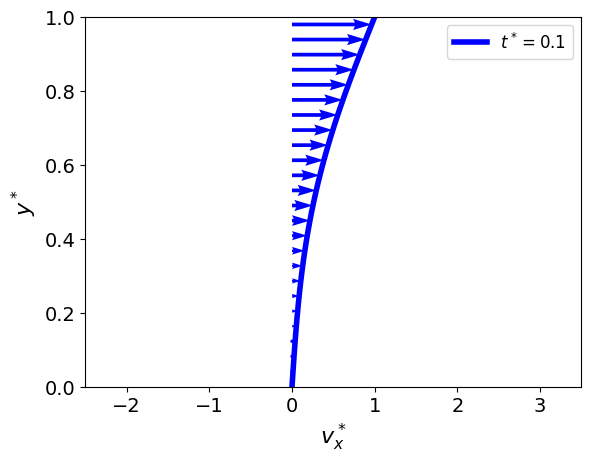

In [4]:
plot_func(0,0.1)

In [5]:
interact(plot_func, Po = widgets.FloatSlider(value=0,
                                             min=-10,
                                             max=+10,
                                             step=0.5),
                    t = widgets.FloatSlider(value=0.01,
                                            min=0.01,
                                            max=1,
                                            step=0.01));

interactive(children=(FloatSlider(value=0.0, description='Po', max=10.0, min=-10.0, step=0.5), FloatSlider(val…

Next, I make an animation for a given $\mathbb{Po}$ value.

In [6]:
Po = 1

In [7]:
# y^* goes from 0 to 1
y = np.linspace(0, 1)
# v_x^* as defined above
vx = unsteadyv(y,0.001,Po)

# set up the figure and axis
fig, ax = plt.subplots()
ax.set_ylabel('$y^*$')
ax.set_ylim(0,1)
ax.set_xlabel('$v_x^*$')
ax.set_xlim(-1,1.5) # would have adjust for other values of Po
# if you want to move horizontal axis label to top so it doesn't clash with animation controls
# but plt.tight_layout() also fixes this
#ax.xaxis.set_label_position('top')
#ax.xaxis.set_ticks_position('top')
plt.tight_layout()
plt.close()

# skip every other data point (using "::2") to reduce number of arrows
# plot arrows emanating only from the reference line, x-coord = 0
quiv = ax.quiver(0*y[::2], y[::2],
                 vx[::2], 0*vx[::2],
                 scale=1., scale_units='xy', color='blue')
line, = ax.plot(vx, y, color='blue', linewidth=4, label='$t=0.001$')

ax.legend()

# number of animation frames
numframes = 100
tmax = 1/3

# animation function called sequentially by `FuncAnimation' below
def animate(t):
  # the t passed is actually the frame counter, not time
  # so it should be rescaled to get actual time as % of the frames
  tstar = t/numframes * tmax

  # update v_x^* in time
  vx = unsteadyv(y,tstar,Po)
  line.set_data(vx, y)
  # update the label with keep 3 decimals, and redraw the legend
  line.set_label(f'$t={tstar:.3f}$')
  ax.legend()
  # plot arrows emanating only from the reference line, x-coord = 0
  quiv.set_UVC(vx[::2], 0*vx[::2])

  return (line,quiv,)

anim = animation.FuncAnimation(fig, animate,
                               frames=numframes,
                               interval=500,
                               blit=True,
                               repeat=False)

# this is necessary to get the animation to work on Google's Colab
rc('animation', html='jshtml')
anim

On your own: rewrite the unsteady solution in terms of the inverse Poiseuille number $\tilde{\mathbb{Po}}$ introduced before, and consider the limit as the wall speed goes to 0.

# DERIVATION OF THE UNSTEADY UNIDIRECTIONAL SOLUTION

Here, I follow [my work](https://arxiv.org/abs/1305.5999), but you can also take a look at Section 3-F of [Leal](https://www.cambridge.org/core/books/advanced-transport-phenomena/9F2A633638780413DA73C6CB70A1D341) (taking into account some minus sign errors therein).

This unsteady unidirectional flow exact solution shows how the velocity evolves from rest to steady state, given that at $t=0^+$ we suddenly impose a pressure gradient and a moving wall.

For an unsteady unidirection flow, $\underline{v}=(v(y,t),0,0)$, the incompressible Navier--Stokes (iNS) equations reduce to
\begin{align*}
    \rho_0 \frac{\partial v}{\partial t} &= -\frac{\partial p}{\partial x} + \mu_0 \frac{\partial^2 v}{\partial y^2},\\
    0 &= -\frac{\partial p}{\partial y},\\
    0 &= -\frac{\partial p}{\partial z}.
\end{align*}
Thus, $p=p(x)$ only, and $-\partial p/\partial x = -dp/dx = \Delta p/L$ is assumed given/known.

The first equation is the sought-after  partial differential equation (PDE) for $v(y,t)$.

The boundary conditions are
\begin{align*}
    p(x=0) &= P_0,\\
    p(x=L) &= P_L,\\
    v(y=0,t) &= 0,\quad~~\text{for all }t>0,\\
    v(y=h,t) &= V_0,\quad\text{for all }t>0.
\end{align*}
Note, $\Delta p = P_0 - P_L$, which is positive for flow from left to right.

The initial condition is that of rest (no flow):
$$
    v(y,t=0) = 0,\quad\text{for all }0\le y\le h.
$$


We seek a separation of variables solution $v(y,t)=Y(y)T(t)$. The boundary conditions in $y$ are not homogeneous. There's several ways to handle this.

I will transform the problem above to a homogoneous one following [my work](https://arxiv.org/abs/1305.5999) by subtracting the _steady state_ solution we already know, but only for $t>0$. That is, let
$$ 
    \hat{v}(y,t) = v(y,t) - H(t) V_0\left[(1+\mathbb{Po})y/h-\mathbb{Po}(y/h)^2\right],
$$
where $H(t)$ the [Heaviside unit step function](https://en.wikipedia.org/wiki/Heaviside_step_function).

Now the initial-boundary-value problem to solve is as follows. The governing equation is
$$
    \rho_0 \frac{\partial \hat{v}}{\partial t} + \delta(t) V_0\left[(1+\mathbb{Po})y/h-\mathbb{Po}(y/h)^2\right] =  \mu_0 \frac{\partial^2 \hat{v}}{\partial y^2}.
$$
Here, $\delta(t)=dH/dt$ is the [Dirac delta distribution](https://en.wikipedia.org/wiki/Dirac_delta_function).
The boundary conditions are modified as
\begin{align*}
\hat{v}(y=0,t) &= 0,\quad\text{for all }t>0,\\
\hat{v}(y=h,t) &= 0,\quad\text{for all }t>0.
\end{align*}
The initial condition is still
$$
    \hat{v}(y,t=0) = 0,\quad\text{for all }0\le y\le h
$$
because $H(t=0^-)=0$.

Next, given the boundary conditions were can see that a Fourier sine serious should work, namely $Y(y)=\sin(n\pi y/h)$. Then, the separation of variable [_ansatz_](https://en.wikipedia.org/wiki/Ansatz) is
$$
    \hat{v}(y,t) = \sum_{n=1}^\infty T(t) \sin(n\pi y/h).
$$

Substituting this form into the governing equation, multiplying by $\sin(m\pi y/h)$, integrating over $0\le y \le h$ and using the the fact that
$$
    \int_0^h \sin(n\pi y/h)\sin(m\pi y/h) \, dy = \frac{h}{2} \delta_{nm},
$$
where $\delta_{nm}$ is the [Kronecker delta symbol](https://en.wikipedia.org/wiki/Kronecker_delta),
we obtain
$$
    \rho_0 \frac{dT}{dt} + \delta(t) V_0 \frac{\int_0^h \left[(1+\mathbb{Po})y/h-\mathbb{Po}(y/h)^2\right] \sin(m\pi y/h) \, dy}{\int_0^h \sin(m\pi y/h)^2 \, dy} =  - \mu_0 \frac{m^2\pi^2}{h^2} T(t).
$$
Some effort shows that
$$
    \frac{\int_0^h \left[(1+\mathbb{Po})y/h-\mathbb{Po}(y/h)^2\right] \sin(m\pi y/h) \, dy}{\int_0^h \sin(m\pi y/h)^2 \, dy}  = \frac{4 \mathbb{Po}-2 (-1)^m \left(\pi ^2 m^2+2 \mathbb{Po}\right)}{\pi^3 m^3}.
$$
So, finally, we have an ODE for $T(t)$:
$$
    \rho_0 \frac{dT}{dt} + \mu_0 \frac{m^2\pi^2}{h^2} T(t) + \delta(t) \rho_0 V_0 \frac{4 \mathbb{Po}-2 (-1)^m \left(\pi ^2 m^2+2 \mathbb{Po}\right)}{\pi^3 m^3} = 0
$$
subject to
$$
    T(0^-) = 0.
$$


In [8]:
# check the integrals with SymPy

# define the variables but also give hints to SymPy
# as to which are positive and which are integers
y = sp.Symbol('y', positive=True)
h = sp.Symbol('h', positive=True)
m = sp.Symbol('m', integer=True, positive=True)
n = sp.Symbol('n', integer=True, positive=True)
Po = sp.Symbol('Po')

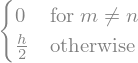

In [9]:
sp.integrate(sp.sin(n*sp.pi*y/h)*sp.sin(m*sp.pi*y/h),(y,0,h)).simplify()

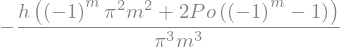

In [10]:
numerint = sp.integrate(((1+Po)*y/h-Po*(y/h)**2)*sp.sin(m*sp.pi*y/h),(y,0,h)).simplify().simplify()
numerint

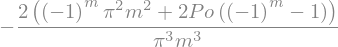

In [11]:
numerint/sp.integrate(sp.sin(m*sp.pi*y/h)**2,(y,0,h))

This ODE can be solved by [Laplace transform](https://en.wikipedia.org/wiki/Laplace_transform):
$$
    \rho_0 s \mathcal{L}\{T\}(s) - \underbrace{0}_{T(0^-)} + \mu_0 \frac{m^2\pi^2}{h^2} \mathcal{L}\{T\}(s) + \underbrace{1}_{\mathcal{L}\{\delta(t)\}} \cdot \rho_0 V_0 \frac{4 \mathbb{Po}-2 (-1)^m \left(\pi ^2 m^2+2 \mathbb{Po}\right)}{\pi^3 m^3} = 0.
$$
This _algebraic_ equation for $\mathcal{L}\{T\}$ as a function of $s$, and involving various constants, is easily solved to find:
$$
    \mathcal{L}\{T\}(s) = - \frac{1}{s + (\mu_0/\rho_0) \frac{m^2\pi^2}{h^2}} \cdot V_0 \frac{4 \mathbb{Po}-2 (-1)^m \left(\pi ^2 m^2+2 \mathbb{Po}\right)}{\pi^3 m^3} = 0.
$$
The inverse Laplace transform is straightforward, using a table of known inverses. Thus, we have:
$$
    T(t) = - H(T)e^{-\frac{\mu_0}{\rho_0} \frac{m^2\pi^2}{h^2} t} V_0 \frac{4 \mathbb{Po}-2 (-1)^m \left(\pi ^2 m^2+2 \mathbb{Po}\right)}{\pi^3 m^3} = 0.
$$
Keep in mind that $T(t)$ does not have to have units of time, it is just a notation we used, in fact it has to have units of velocity, and it does here.

In [12]:
# check the Laplace transform using SymPy
t = sp.Symbol('t')
s = sp.Symbol('s')
sp.laplace_transform(sp.functions.special.delta_functions.DiracDelta(t), t, s, noconds=True)

In [13]:
T = sp.Function('T')(t)
sp.laplace_transform(T.diff(t), t, s, noconds=True)

In [14]:
a = sp.Symbol('a')
sp.inverse_laplace_transform(1/(s+a), s, t)
# note SymPy denotes H(t) as \theta(t)

Introducing the dimensionless variables
$$
    v^* = \frac{v}{V_0},\qquad y^*=\frac{y}{h},\qquad t^* = \frac{t}{\rho_0 h^2/\mu_0} = \frac{t}{h^2/\nu_0},
$$
and putting toger the the piece, we have
\begin{align*}
    \hat{v}^*(y^*,t^*) &= \sum_{n=1}^\infty \frac{1}{V_0} T(t)Y(y) \\
    &= -H(t^*)\sum_{n=1}^\infty e^{- n^2\pi^2 t^*}  \frac{4 \mathbb{Po}-2 (-1)^n \left(\pi ^2 n^2+2 \mathbb{Po}\right)}{\pi^3 n^3} \sin(n\pi y^*).
\end{align*}
Hence, undoing the change of variables on the velocity,
\begin{align*}
    v^*(y^*,t^*) &= \hat{v}^*(y^*,t^*) + H(t^*) \left[(1+\mathbb{Po})y/h-\mathbb{Po}(y/h)^2\right]\\
    &= H(t^*)\left[ (1+\mathbb{Po})y/h-\mathbb{Po}(y/h)^2 - \sum_{n=1}^\infty e^{- n^2\pi^2 t^*}  \frac{4 \mathbb{Po}-2 (-1)^n \left(\pi ^2 n^2+2 \mathbb{Po}\right)}{\pi^3 n^3} \sin(n\pi y^*) \right]\\
    &= (1+\mathbb{Po})y/h-\mathbb{Po}(y/h)^2 - \sum_{n=1}^\infty e^{- n^2\pi^2 t^*}  \frac{4 \mathbb{Po}-2 (-1)^n \left(\pi ^2 n^2+2 \mathbb{Po}\right)}{\pi^3 n^3} \sin(n\pi y^*), \quad t^*>0,
\end{align*}
which is the solution quoted at the beginning of the notebook.